# <center> Predicting Star Size | Linear Regression
---

<center> <img src = 'https://drive.google.com/uc?id=1Wr3rLlNCBU5qjr1s7o1l-O3DjgLDZIJi' width = 100%>

---

## <center> Linear Regression from Scratch

---
    


**Recall the following topics before we start today's session:-**        
**1)** Supervised Learning - When we train the ML algorithms with labeled data.       
**2)** Forward Propagation - Consists of two steps which are computing the predicted output and the cost function.         
**3)** Backpropagation - Consists of optimization algorithm which will be used to update the model parameters.         
**4)** Training - For each epoch we calculate the loss and then update the model parameters.            
**5)** Testing - Using new inputs whose respective outputs if we know, we can check how our model is performing.         

    
**Python Libraires that we need today:-**           
**1)** NumPy       
**2)** Matplotlib        
**3)** Pandas
    
                                

## Generating the Data for Linear Regression


In [ ]:
# Importing Libraries (numpy and pyplot)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

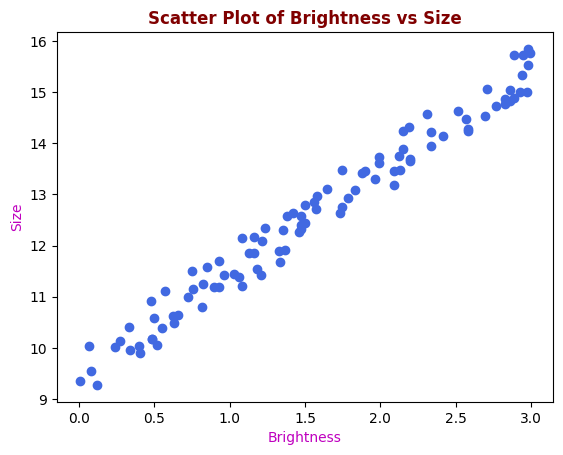

In [ ]:
# Use seed value of 100 so that everyone gets the same output!
np.random.seed(100)

# Generating Randomized dataset --> X_train and y_train
'''
X_train = 3*random numbers between 0 and 1 of shape (100, 1)
y_train = 9 + 2*X_train + noise, where noise is a random number between 0 and 1 and its shape is (100, 1)
The noise will allow to have some randomness in output instead of it simply being in a straight line

Our goal of this session is to train ML model --> Linear Regression to predict the values of 9 and 2 in y_train
In reality, we don't have y_train formula. Hence, we make ML model to predict what should be the formula!
'''

# Define the noise
noise = np.random.random(size=(100, 1)) # numpy's random's function random will give outputs between [0, 1)

# Define X_train (Input variable) and y_train (True outputs / Target)
X_train = 3 * np.random.random(size=(100, 1))
y_train = 9 + 2*X_train + noise # In real life, we just dataset without the equation, hence we find eqn of prediction

# Scatter plot --> Figsize is (8,6), Xlabel is brightness, ylabel is Size, add title
plt.scatter(X_train, y_train, color='royalblue')
plt.xlabel('Brightness', color = 'm')
plt.ylabel('Size', color = 'm')
plt.title('Scatter Plot of Brightness vs Size', weight = 'bold', color = 'maroon')
plt.show()

In [ ]:
# Print first 5 values in X_train and y_train
print('First 5 values of X_train:-\n', X_train[:5])
print()
print('First 5 values of y_train:-\n', y_train[:5])

First 5 values of X_train:-
 [[2.33486765]
 [2.3387952 ]
 [1.83098446]
 [0.92700105]
 [2.09320472]]

First 5 values of y_train:-
 [[14.21314023]
 [13.95595978]
 [13.08648651]
 [11.69877822]
 [13.1911283 ]]


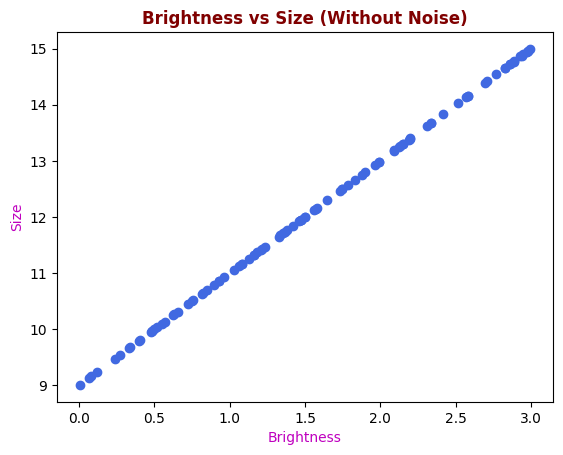

In [ ]:
# Check what happens if you remove the noise! --> Remove noise from the y_train and plot again
plt.scatter(X_train, y_train-noise, color='royalblue')
plt.xlabel('Brightness', color = 'm')
plt.ylabel('Size', color = 'm')
plt.title('Brightness vs Size (Without Noise)', weight = 'bold', color = 'maroon')
plt.show()

- This will be a pure straight line
- We can find gradient and y-intercept without ML
- So to apply ML we need data to be realistic
- Hence, to mimic the real conditions we add some noise

## Model Parameters and Hyperparameters

Remember that instead of using gradient and y-intercept, we will be using the actual model parameters for ML algorithms - Weight and Bias!

In [ ]:
# Initialise the weight (W) and bias (b) to 0
W = 0
b = 0

# Hyperparameters --> Choose approproate learning_rate (0.01)
learning_rate = 0.01

<img src = "https://drive.google.com/uc?id=1mFaXv4XF-_b-jyP_MK2vfgYfB2dVd4RZ">

## Computing equations for the forward propagation

In [ ]:
# Create a function for Predicted Output
def predict(X, W, b):
    '''
    X - Inputs
    W - Weight
    b - Bias

    Returns - Predicted output
    '''
    return W*X + b

# MSE cost function
def cost_function(X, y, W, b):
    '''
    y - target values / true values
    Returns - MSE
    '''
    y_cap = predict(X, W, b)
    mse_cost = np.mean((y - y_cap)**2)
    return mse_cost

In [ ]:
# Check that cost function is not giving any errors!
cost_function(X_train, y_train, W, b)

161.44989262947942

<img src = 'https://drive.google.com/uc?id=1ZlXFrHr4ix4w2ND9e1QMZqaMuplh-PTh'>

## Computing equations for the backpropagation


In [ ]:
def update_weights(X, y, W, b, learning_rate):
    '''
    This function computes all the equations needed for the backpropagation in Linear Regression
    '''

    # Gradients for cost wrt model parameters
    dLdW = np.mean(-2 * X * (y - predict(X, W, b)))
    dLdb = np.mean(-2 * (y - predict(X, W, b)))

    # Gradient Descent Optimizer (theta_new = theta_prev - learning_rate*dL_dtheta)
    W = W - learning_rate*dLdW
    b = b - learning_rate*dLdb

    return W, b

In [ ]:
# Check if update_weights function is not giving any errors
update_weights(X_train, y_train, W, b, learning_rate)

(0.4215805946321207, 0.25175313050147874)

In [ ]:
# Epoch by epoch train the linear regression to get the best value for W and b
def train(X, y, W, b, learning_rate, tol=1e-13, n_epochs=100, verbose=False):
    '''
    This function trains the linear regression epoch by epoch
    tol - Threshold for when the training should stop based on convergence
    verbose - Display the training if it is set to True
    '''

    weights = [W]
    biases = [b]
    costs = []


    # Training Loop
    '''
    Until Cost Convergers do the following:-
    1) Get the cost value on the current W and b value
    2) Append that cost value to the costs list
    3) If we have more than 1 cost value in costs list then compare if it has coverged
    4) If converged correct to 13 dp, then stop the training loop or else continue the training process

    At the same time, you can print the values of W, b and the respective cost after every n epochs
    '''

    # Prepare the counter to monitor the training
    ct = 1

    # Start the training loop here
    while True:

      # 1) Calculate the cost
      cost = cost_function(X, y, W, b)

      # 2) Append the cost value to costs list
      costs.append(cost)

      # 3) Check if the cost has converged if more than one cost value in the costs list
      if len(costs) > 1 and abs(costs[-1] - costs[-2]) < tol:
        break

      # 4) If costs have not converged, update the model parameters
      W, b = update_weights(X, y, W, b, learning_rate)

      # 5) Append the updated W and b to the weights and biases list
      weights.append(W)
      biases.append(b)

      # 6) After every n_epochs I want to display my training result
      if verbose and ct % n_epochs == 0:
        print(f'After {ct}:- W = {W}, b = {b}, cost = {cost}')

      # 7) Update the counter after epoch is completed to keep track for epochs
      ct += 1

    return weights, biases, costs, ct

In [ ]:
# Train the linear regression model
weights, biases, costs, iteration_count = train(X_train, y_train, W, b, learning_rate, verbose=True)

After 100:- W = 4.371270980255095, b = 4.9223675279927726, cost = 5.09357952602552
After 200:- W = 3.627260111648974, b = 6.350228346474647, cost = 2.456398870793634
After 300:- W = 3.114290632476111, b = 7.332411667839953, cost = 1.207342476597626
After 400:- W = 2.7612588545764885, b = 8.008361502107816, cost = 0.615745393165454
After 500:- W = 2.5182982897188375, b = 8.473558019193861, cost = 0.33554418627685595
After 600:- W = 2.3510900105855543, b = 8.793711658638683, cost = 0.202831029737385
After 700:- W = 2.2360153332316717, b = 9.014045107160197, cost = 0.13997340640933104
After 800:- W = 2.156819605384098, b = 9.165681142351206, cost = 0.11020182299230447
After 900:- W = 2.102316186790805, b = 9.270038820782414, cost = 0.09610095292709307
After 1000:- W = 2.0648063018627574, b = 9.341858985651754, cost = 0.08942228441924822
After 1100:- W = 2.0389915639320098, b = 9.391286456245215, cost = 0.08625903188012053
After 1200:- W = 2.021225561831194, b = 9.425303014877619, cost = 0

In [ ]:
# Comparing initial and final values
initial = [weights[0], biases[0], costs[0]]
final = [weights[-1], biases[-1], costs[-1]]
df = pd.DataFrame(list(zip(initial,final)),
                  columns = ['Initial', 'Final'],
                  index = ['Weight', 'Bias', 'Cost'])
df

,Initial,Final
Weight,0.000000,1.982015
Bias,0.000000,9.500380
Cost,161.449893,0.083413


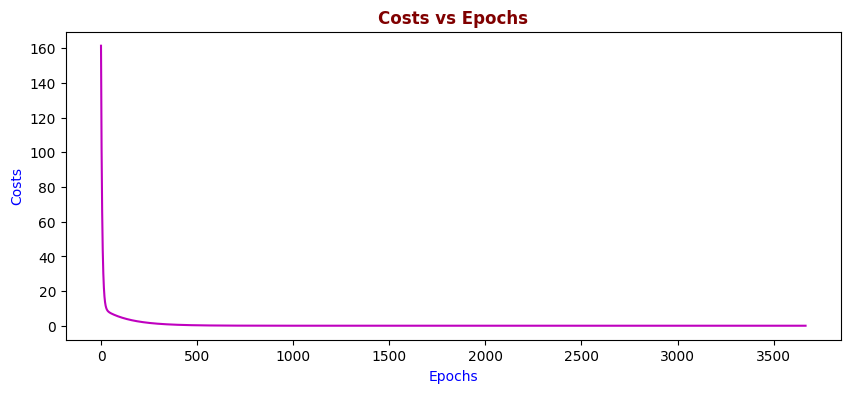

In [ ]:
# Visualising the cost wrt epochs
plt.figure(figsize=(10, 4))
plt.plot(costs, color='m')
plt.xlabel('Epochs', color='blue')
plt.ylabel('Costs', color='blue')
plt.title('Costs vs Epochs', weight='bold', color='maroon')
plt.show()

In [ ]:
# Define a seed value (using different seed value compared to trianing set to avoid data leakage!) --> 5007
np.random.seed(5007)  # This number was choose to get the optimal results with random values

# Test data
X_test = 3*np.random.rand(10,1)
y_test = 9 + 2*X_test + np.random.rand(10,1)

prediction = predict(X_test, weights[-1], biases[-1])

# DataFrame to compare true and predicted outputs on test inputs
df1 = pd.DataFrame(list(zip(X_test.reshape(10,), y_test.reshape(10,), prediction.reshape(10,))),
                  columns = ['Test Input', 'True Output', 'Predicted Output'])
df1

,Test Input,True Output,Predicted Output
0,0.723836,10.889388,10.935035
1,1.900129,13.358554,13.266463
2,0.126943,9.974414,9.751983
3,2.026471,13.566160,13.516875
4,2.647429,14.842352,14.747624
5,1.238825,12.071978,11.955750
6,1.561243,12.881255,12.594786
7,2.042729,13.622504,13.549100
8,1.230220,12.098017,11.938694
9,0.382516,10.325675,10.258534


In [ ]:
# Calculate the mean sqaured error to evaluate the performance
mse = np.mean((y_test - prediction)**2)
print(f'The Means Squared Error:- {round(mse, 3)} (3dp).')

The Means Squared Error:- 0.02 (3dp).


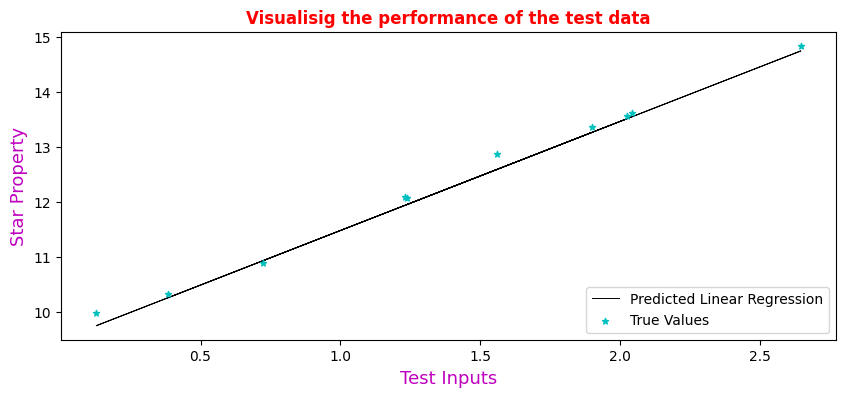

In [ ]:
# Visualise the performance of the test data
plt.figure(figsize = (10,4))
plt.plot(X_test, prediction, color="k", linewidth = 0.7)
plt.scatter(X_test, y_test, color="c", marker = '*', s = 20, zorder = 2)
plt.title("Visualisig the performance of the test data", color = 'red', weight = 'bold')
plt.xlabel("Test Inputs", color = 'm', fontsize = 13)
plt.ylabel("Star Property", color = 'm', fontsize = 13)
plt.legend(['Predicted Linear Regression', 'True Values'], loc='lower right')
plt.show()

---

## <center> Linear Regression using Scikit-Learn library

---

- Linear regression is a foundational algorithm in machine learning.
- It is used for predicting a continuous target variable based on one or more input features.
- Scikit-learn's `LinearRegression` module provides a straightforward way to implement this technique.
- However, it uses Ordinary Least Square Regression to get the line of best fit.

Let us compare our Gradient Descent method with sklearn's Ordinary Least Square Regression method...


#### Step 1: Input Data

**Gather your data:-**
- You need a dataset with input features (independent variables) and corresponding target values (dependent variable).
- Both of this data already defined for our usecase.

In [ ]:
# Training data - first 5 sample
print('First 5 Independent Feature:-\n', X_train[:5])
print()
print('Rescpective Dependent Feature:-\n', y_train[:5])

First 5 Independent Feature:-
 [[2.33486765]
 [2.3387952 ]
 [1.83098446]
 [0.92700105]
 [2.09320472]]

Rescpective Dependent Feature:-
 [[14.21314023]
 [13.95595978]
 [13.08648651]
 [11.69877822]
 [13.1911283 ]]


In [ ]:
# Testing data - first 5 sample
print('First 5 Independent Feature:-\n', X_test[:5])
print()
print('Rescpective Dependent Feature:-\n', y_test[:5])

First 5 Independent Feature:-
 [[0.72383636]
 [1.90012877]
 [0.12694282]
 [2.0264709 ]
 [2.64742922]]

Rescpective Dependent Feature:-
 [[10.88938808]
 [13.35855419]
 [ 9.97441367]
 [13.56616042]
 [14.84235246]]


#### Step 2: Import and Initialize

**Import the necessary modules:-**
- Import the `LinearRegression` class from scikit-learn's `linear_model` module.
- [Here](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/linear_model/_base.py) is the official code from sklearn. Just press `ctrl+f` and search for `LinearRegression`.

**Create a model instance:-**
- Initialize a LinearRegression object.
- This represents the linear relationship between the inputs and the target.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create the object of the Linear Regression
sklearn_model = LinearRegression(fit_intercept=True,  # If true include intercept
                                 copy_X=True,         # If true reserve a copy of X so that it remains unchanged
                                 n_jobs=None,         # If none, single CPU core, no parallelization used
                                 positive=False)      # If true, forces the coefficients to be positive

#### Step 3: Training

**Fit the model:-**
- Use the `fit()` method of the model to train it on your data.
- The algorithm learns the coefficients and intercept that define the linear relationship.

**Learning process:-**
- The algorithm internally uses the least squares optimization method.
- It is used to minimize the sum of squared differences between the actual target values and the predicted values.

In [ ]:
sklearn_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Scikit-Learn model:-')
print('Optimal Weight = {}'.format(sklearn_model.coef_[0][0]))
print('Optimal Bias = {}'.format(sklearn_model.intercept_[0]))

print()

print('Scratch model:-')
print('Optimal Weight = {}'.format(weights[-1]))
print('Optimal Bias = {}'.format(biases[-1]))

Scikit-Learn model:-
Optimal Weight = 1.9820106046856956
Optimal Bias = 9.500387880985212

Scratch model:-
Optimal Weight = 1.982014510179785
Optimal Bias = 9.500380403136907


#### Step 4: Prediction

**Make predictions:-**
- Once the model is trained, you can use the `predict()` method to make predictions on new data points.
- The model applies the learned linear relationship to these inputs.

In [ ]:
predictions = sklearn_model.predict(X_test)
mse_skl = np.mean((y_test - predictions)**2)
print(f"The MSE value of sklearn model:- {round(mse_skl, 5)} (5dp)")
print(f"The MSE value of scratch model:- {round(mse, 5)} (5dp)")

The MSE value of sklearn model:- 0.02023 (5dp)
The MSE value of scratch model:- 0.02023 (5dp)


* Both the Gradient Desecent and Ordinary Least Square Regression methods are performing well!

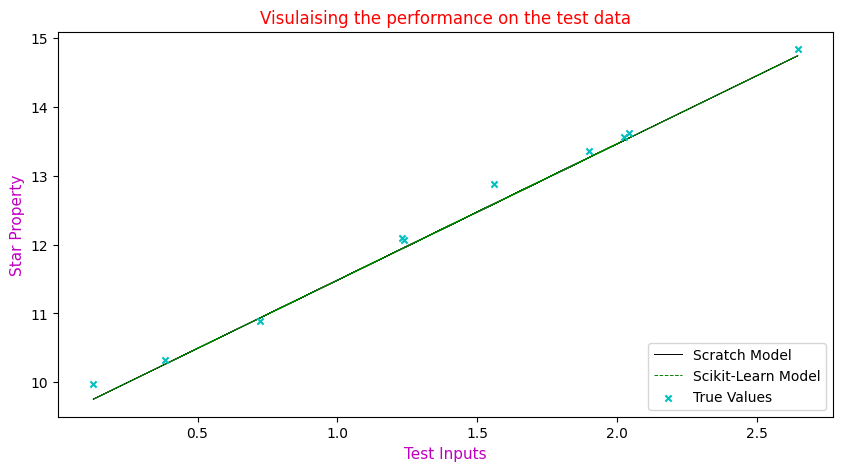

In [ ]:
# Visualise the performance of the test data
plt.figure(figsize = (10,5))
plt.plot(X_test, prediction, color="k", label="predicted", linewidth = 0.7)
plt.plot(X_test, predictions,  "g--", label="predicted", linewidth = 0.7)
plt.scatter(X_test, y_test, color="c", label="original", marker = 'x', s = 20, zorder = 2)
plt.title(f"Visulaising the performance on the test data", color = 'red')
plt.xlabel("Test Inputs", color = 'm', fontsize = 11)
plt.ylabel("Star Property", color = 'm', fontsize = 11)
plt.legend(['Scratch Model', 'Scikit-Learn Model', 'True Values', ], loc = 'lower right')
plt.show()

* Just look at how similar predictions we are getting!
* Now that you have learnt gradient descent algorithm, it will be very useful in some of the upcoming lectures.

### Ending Notes
- Remember, while Linear Regression is powerful, it's just the beginning.
- Machine learning offers a vast array of algorithms for different tasks, each with its strengths and weaknesses.
- We shall dive deeper into this exciting field to explore more advanced techniques in the upcoming days.

---